Found 51 files belonging to 10 classes.
Class names: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Model loaded successfully.
1/1 [==============================] - 0s 46ms/step

Confusion Matrix:


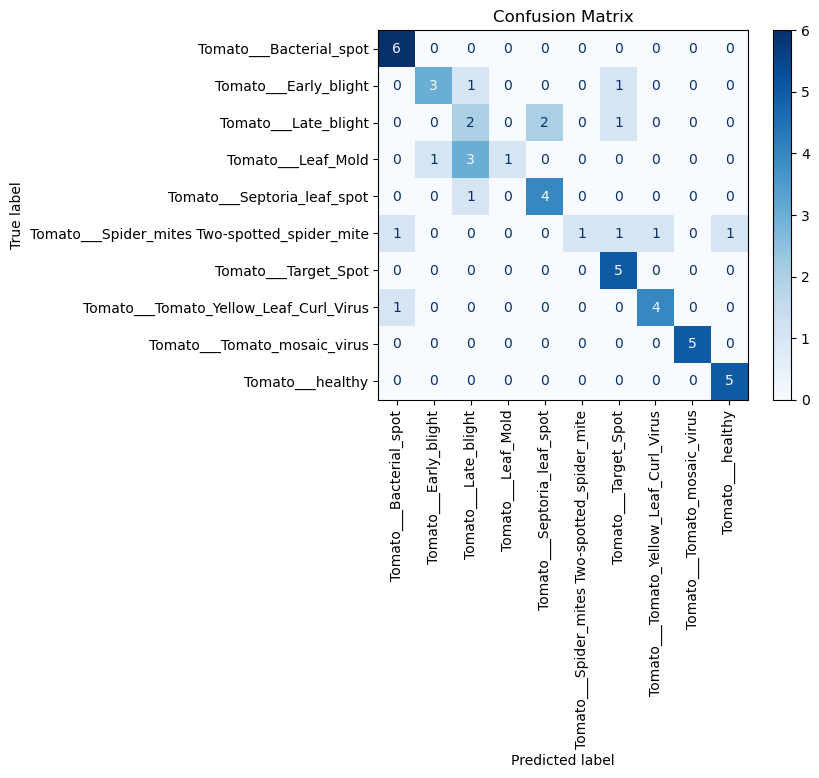


Classification Report:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.75      1.00      0.86         6
                        Tomato___Early_blight       0.75      0.60      0.67         5
                         Tomato___Late_blight       0.29      0.40      0.33         5
                           Tomato___Leaf_Mold       1.00      0.20      0.33         5
                  Tomato___Septoria_leaf_spot       0.67      0.80      0.73         5
Tomato___Spider_mites Two-spotted_spider_mite       1.00      0.20      0.33         5
                         Tomato___Target_Spot       0.62      1.00      0.77         5
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.80      0.80      0.80         5
                 Tomato___Tomato_mosaic_virus       1.00      1.00      1.00         5
                             Tomato___healthy       0.83      1.00      0.91         5

                 

C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


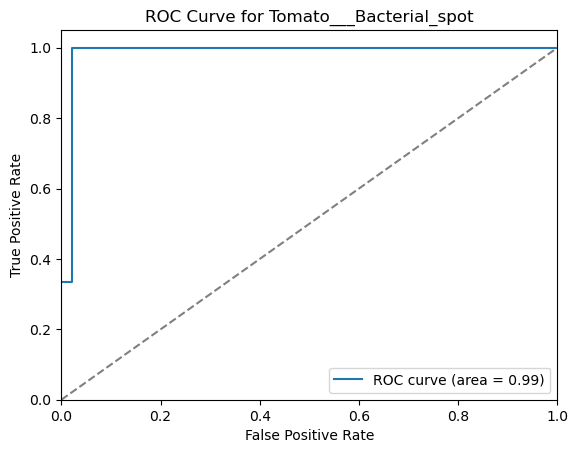

Tomato___Early_blight: 0.87


C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


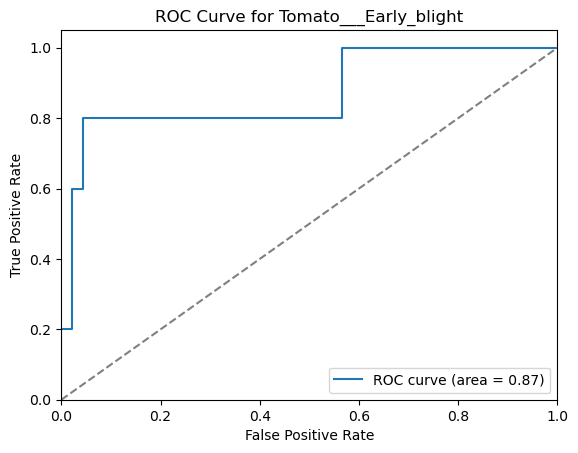

Tomato___Late_blight: 0.75


C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


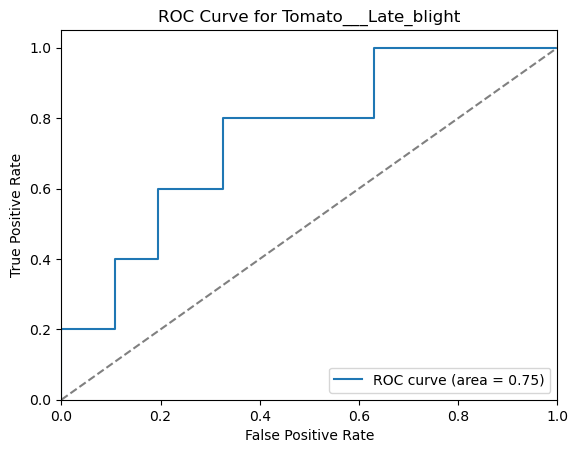

C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


Tomato___Leaf_Mold: 0.66


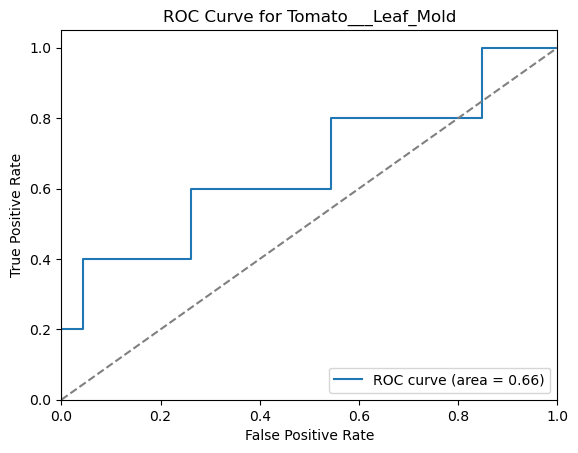

Tomato___Septoria_leaf_spot: 0.89


C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


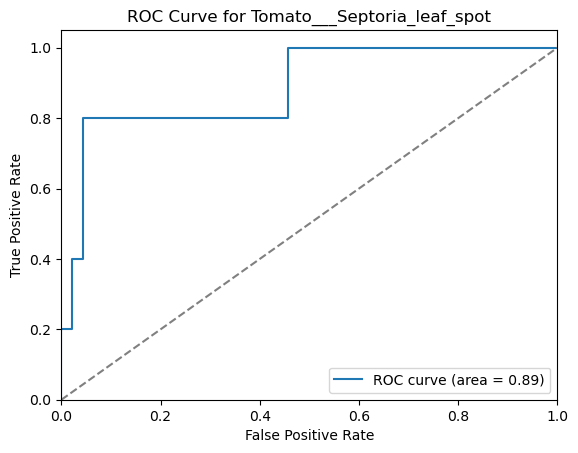

C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


Tomato___Spider_mites Two-spotted_spider_mite: 0.92


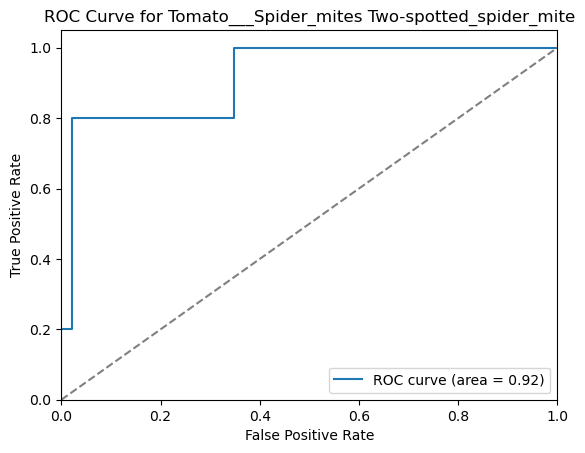

Tomato___Target_Spot: 1.00


C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


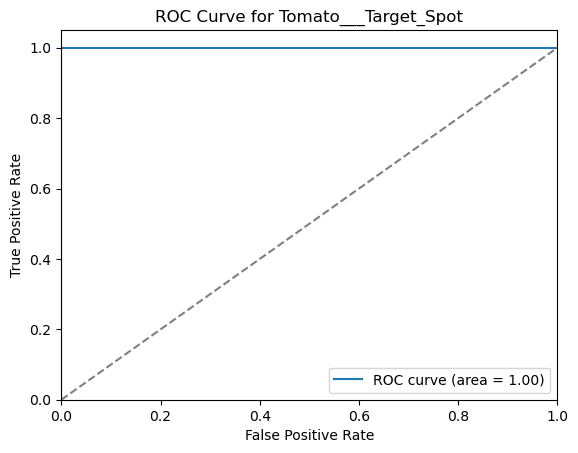

C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


Tomato___Tomato_Yellow_Leaf_Curl_Virus: 0.99


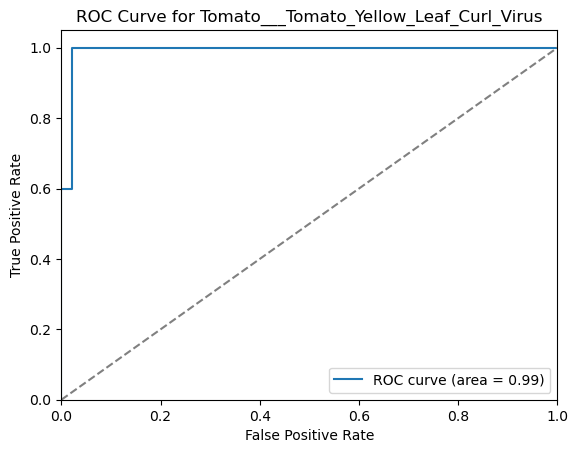

C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


Tomato___Tomato_mosaic_virus: 1.00


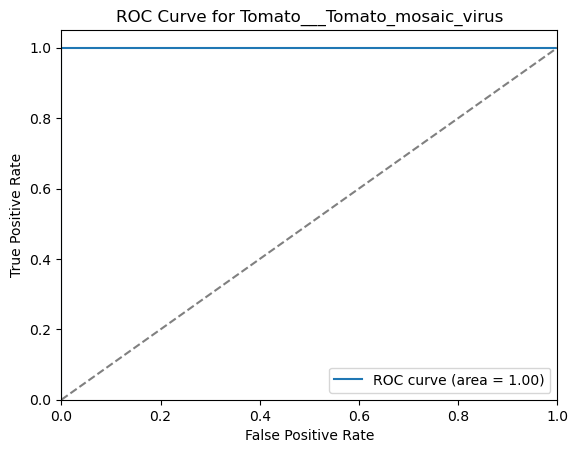

C:\Users\Dilina Fernando\AppData\Local\Temp\ipykernel_18180\1094620010.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess


Tomato___healthy: 0.99


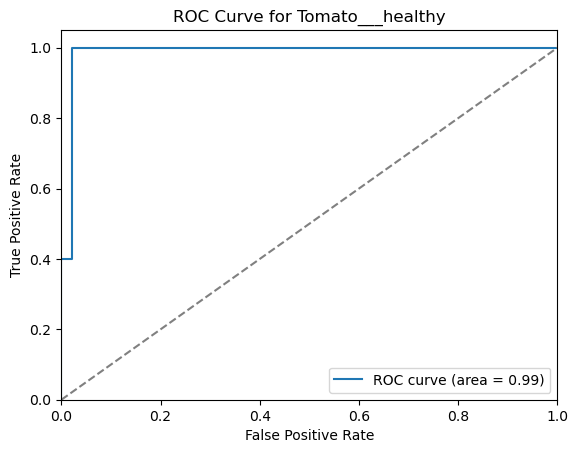

In [3]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Constants
BATCH_SIZE = 16
IMAGE_SIZE = 224
CHANNELS = 3

# Load the test dataset
def load_test_dataset(directory):
    test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=False  # No shuffling for test dataset
    )
    return test_dataset

test_directory = r"C:\Users\Dilina Fernando\Downloads\archive (24)\tomato\test"
test_dataset = load_test_dataset(test_directory)

# Get class names (assume they're the same as training)
class_names = test_dataset.class_names
print("Class names:", class_names)

# Evaluate the model with Confusion Matrix, ROC, and AUC
def evaluate_model_with_metrics(model, test_dataset):
    y_true = []
    y_pred = []
    y_probs = []  # For ROC and AUC

    # Iterate over the test dataset
    for images, labels in test_dataset:
        predictions = model.predict(images)
        y_probs.extend(predictions)  # Store predicted probabilities
        y_true.extend(labels.numpy())  # True labels
        y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_probs = np.array(y_probs)

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # ROC and AUC for each class
    print("\nAUC for each class:")
    for i, class_name in enumerate(class_names):
        # Calculate ROC curve and AUC for the class
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        print(f"{class_name}: {roc_auc:.2f}")

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line for random guess
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {class_name}")
        plt.legend(loc="lower right")
        plt.show()

# Load the trained model (provide the path to your trained model file)
model_path = r"C:\Users\Dilina Fernando\Downloads\archive (24)\tomato\new_model_1\tomato.h5"
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully.")

# Evaluate the model
evaluate_model_with_metrics(model, test_dataset)


In [6]:
from tensorflow.keras.preprocessing import image

# Define the sample test image directory
sample_images_dir = r"C:\Users\Dilina Fernando\Downloads\archive (24)\tomato\test\Tomato___Late_blight"  # Update with the directory of 5 sample images per category

# Iterate through sample images
for img_file in os.listdir(sample_images_dir):
    img_path = os.path.join(sample_images_dir, img_file)
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    true_class = img_file.split("_")[0]  # Assuming file names are like "class_imagename.jpg"

    # Print results
    print(f"Image: {img_file}")
    print(f"True Class: {true_class}, Predicted Class: {predicted_class}")


1/1 [==============================] - 0s 35ms/step
Image: 01d9be0b-c5e7-49db-8cdf-46bd0ef2c6e7___RS_Late.B 7066.JPG
True Class: 01d9be0b-c5e7-49db-8cdf-46bd0ef2c6e7, Predicted Class: Tomato___Late_blight
1/1 [==============================] - 0s 36ms/step
Image: 0ab172fa-ac7b-4a3e-90c8-0708703eb3bb___RS_Late.B 5572.JPG
True Class: 0ab172fa-ac7b-4a3e-90c8-0708703eb3bb, Predicted Class: Tomato___Late_blight
1/1 [==============================] - 0s 43ms/step
Image: 0b137624-885b-4d9b-b9e6-330c6681de4b___GHLB2 Leaf 8848.JPG
True Class: 0b137624-885b-4d9b-b9e6-330c6681de4b, Predicted Class: Tomato___Late_blight
1/1 [==============================] - 0s 35ms/step
Image: 1f38a263-cfb5-47fe-8c0e-f8d62141f922___GHLB_PS leaf 28 Day 12 .jpg
True Class: 1f38a263-cfb5-47fe-8c0e-f8d62141f922, Predicted Class: Tomato___Late_blight
1/1 [==============================] - 0s 38ms/step
Image: Tomato___Late_blight_original_1ba00fc3-a45b-4d23-94da-5e090ba7f3d3___RS_Late.B 6403.JPG_9007ac2c-ae15-46e6-87b6